# Predicting Tennis Match Results Data Science Project
Joao Victor Omena de Lucena <br>
May 1st, 2022

# Import

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from prettytable import PrettyTable
from sklearn.model_selection import train_test_split
import sklearn.tree as tree
from sklearn import metrics
import sklearn.ensemble as ens
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler 
from sklearn import svm

# Loading the Data

In [38]:
#Combine data from csv
df = pd.concat(
    map(pd.read_csv, ['atp_matches_1995.csv', 'atp_matches_1996.csv', 'atp_matches_1997.csv',
                      'atp_matches_1998.csv', 'atp_matches_1999.csv', 'atp_matches_2000.csv',
                      'atp_matches_2001.csv', 'atp_matches_2002.csv', 'atp_matches_2003.csv',
                      'atp_matches_2004.csv', 'atp_matches_2005.csv', 'atp_matches_2006.csv',
                      'atp_matches_2007.csv', 'atp_matches_2008.csv', 'atp_matches_2009.csv',
                      'atp_matches_2010.csv', 'atp_matches_2011.csv', 'atp_matches_2012.csv',
                      'atp_matches_2013.csv', 'atp_matches_2014.csv', 'atp_matches_2015.csv',
                      'atp_matches_2016.csv', 'atp_matches_2017.csv', 'atp_matches_2018.csv',
                      'atp_matches_2019.csv', 'atp_matches_2020.csv', 'atp_matches_2021.csv'
                     ]), ignore_index=True)

df.shape

(84013, 49)

In [39]:
df.dtypes

tourney_id             object
tourney_name           object
surface                object
draw_size               int64
tourney_level          object
tourney_date            int64
match_num               int64
winner_id               int64
winner_seed           float64
winner_entry           object
winner_name            object
winner_hand            object
winner_ht             float64
winner_ioc             object
winner_age            float64
loser_id                int64
loser_seed            float64
loser_entry            object
loser_name             object
loser_hand             object
loser_ht              float64
loser_ioc              object
loser_age             float64
score                  object
best_of                 int64
round                  object
minutes               float64
w_ace                 float64
w_df                  float64
w_svpt                float64
w_1stIn               float64
w_1stWon              float64
w_2ndWon              float64
w_SvGms   

# Data Cleaning

In [40]:
modified_df = df[['surface', 'best_of', 'round', 'minutes', 
            'winner_rank','winner_ht', 'w_1stWon', 'w_bpFaced',
              'loser_rank','loser_ht','l_1stWon', 'l_bpFaced']]

In [41]:
modified_df['rank_diff'] = modified_df['winner_rank']- modified_df['loser_rank']
modified_df['height_diff'] = modified_df['winner_ht']- modified_df['loser_ht']
modified_df['1stWon_diff'] = modified_df['w_1stWon']- modified_df['l_1stWon']
modified_df['bpFaced_diff'] = modified_df['w_bpFaced']- modified_df['l_bpFaced']

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [42]:
clean_df = modified_df[['surface', 'best_of', 'round', 'minutes', 
            'rank_diff','height_diff', '1stWon_diff', 'bpFaced_diff']]

clean_df['winner'] = np.random.choice([0, 1], clean_df.shape[0])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [43]:
clean_df['rank_diff'] = np.where(clean_df['winner'] == 1, 0 - clean_df['rank_diff'],clean_df['rank_diff'])
clean_df['height_diff'] = np.where(clean_df['winner'] == 1, 0 - clean_df['height_diff'],clean_df['height_diff'])
clean_df['1stWon_diff'] = np.where(clean_df['winner'] == 1, 0 - clean_df['1stWon_diff'],clean_df['1stWon_diff'])
clean_df['bpFaced_diff'] = np.where(clean_df['winner'] == 1, 0 - clean_df['bpFaced_diff'],clean_df['bpFaced_diff'])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

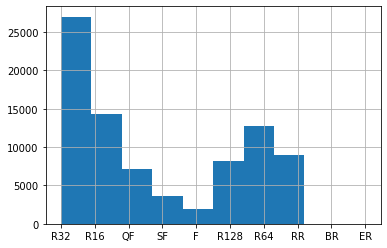

In [44]:
clean_df['round'].hist()

In [45]:
clean_df = clean_df[(clean_df['round'] != 'BR') & (clean_df['round'] != 'ER')]

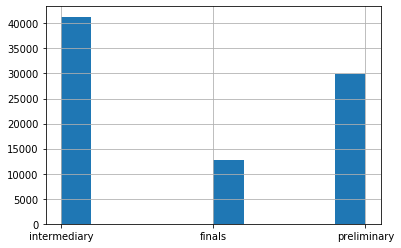

In [46]:
clean_df['round'] = np.where((clean_df['round'] == 'QF') | (clean_df['round'] == 'SF') | (clean_df['round'] == 'F'), 'finals',
                             np.where((clean_df['round']=='R32') | (clean_df['round']=='R16'), 'intermediary', 'preliminary'))

clean_df['round'].hist()

In [47]:
NaN_table = PrettyTable(["Attribute", "NaN Count"])
NaN_table.align["Attribute"] = "l"
 
cnt_na = clean_df[(clean_df['surface'].isna())].shape[0]
NaN_table.add_row(['surface', cnt_na])

cnt_na = clean_df[(clean_df['best_of'].isna())].shape[0]
NaN_table.add_row(['best_of', cnt_na])

cnt_na = clean_df[(clean_df['round'].isna())].shape[0]
NaN_table.add_row(['round', cnt_na])

cnt_na = clean_df[(clean_df['minutes'].isna())].shape[0]
NaN_table.add_row(['minutes', cnt_na])

cnt_na = clean_df[(clean_df['rank_diff'].isna())].shape[0]
NaN_table.add_row(['rank_diff', cnt_na])

cnt_na = clean_df[(clean_df['height_diff'].isna())].shape[0]
NaN_table.add_row(['height_diff', cnt_na])

cnt_na = clean_df[(clean_df['1stWon_diff'].isna())].shape[0]
NaN_table.add_row(['1stWon_diff', cnt_na])

cnt_na = clean_df[(clean_df['bpFaced_diff'].isna())].shape[0]
NaN_table.add_row(['bpFaced_diff', cnt_na])


print(NaN_table)

+--------------+-----------+
| Attribute    | NaN Count |
+--------------+-----------+
| surface      |     0     |
| best_of      |     0     |
| round        |     0     |
| minutes      |    9940   |
| rank_diff    |    2192   |
| height_diff  |    7315   |
| 1stWon_diff  |    8103   |
| bpFaced_diff |    8103   |
+--------------+-----------+


In [48]:
clean_df = clean_df[(clean_df['rank_diff'].notna())]
clean_df = clean_df[(clean_df['height_diff'].notna())]
clean_df = clean_df[(clean_df['1stWon_diff'].notna())]
clean_df = clean_df[(clean_df['minutes'].notna())]

In [49]:
NaN_table = PrettyTable(["Attribute", "NaN Count"])
NaN_table.align["Attribute"] = "l"
 
cnt_na = clean_df[(clean_df['surface'].isna())].shape[0]
NaN_table.add_row(['surface', cnt_na])

cnt_na = clean_df[(clean_df['best_of'].isna())].shape[0]
NaN_table.add_row(['best_of', cnt_na])

cnt_na = clean_df[(clean_df['round'].isna())].shape[0]
NaN_table.add_row(['round', cnt_na])

cnt_na = clean_df[(clean_df['minutes'].isna())].shape[0]
NaN_table.add_row(['minutes', cnt_na])

cnt_na = clean_df[(clean_df['rank_diff'].isna())].shape[0]
NaN_table.add_row(['rank_diff', cnt_na])

cnt_na = clean_df[(clean_df['height_diff'].isna())].shape[0]
NaN_table.add_row(['height_diff', cnt_na])

cnt_na = clean_df[(clean_df['1stWon_diff'].isna())].shape[0]
NaN_table.add_row(['1stWon_diff', cnt_na])

cnt_na = clean_df[(clean_df['bpFaced_diff'].isna())].shape[0]
NaN_table.add_row(['bpFaced_diff', cnt_na])

print(NaN_table)

+--------------+-----------+
| Attribute    | NaN Count |
+--------------+-----------+
| surface      |     0     |
| best_of      |     0     |
| round        |     0     |
| minutes      |     0     |
| rank_diff    |     0     |
| height_diff  |     0     |
| 1stWon_diff  |     0     |
| bpFaced_diff |     0     |
+--------------+-----------+


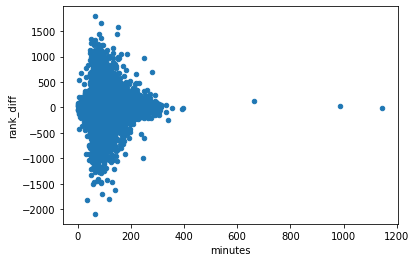

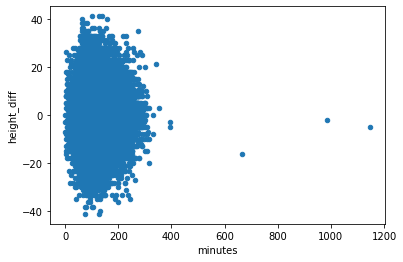

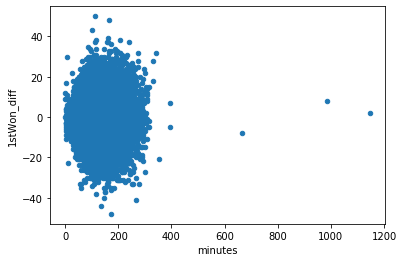

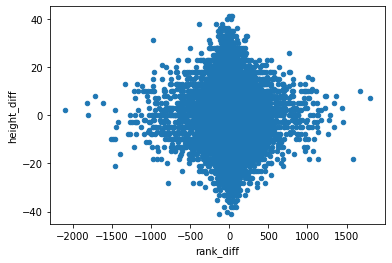

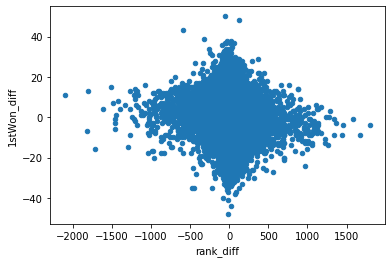

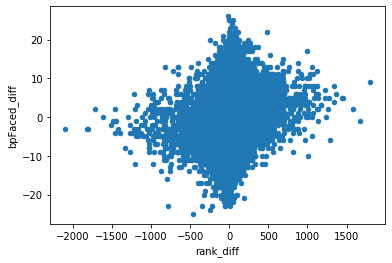

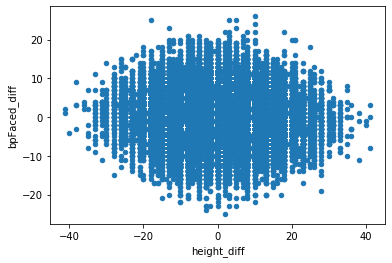

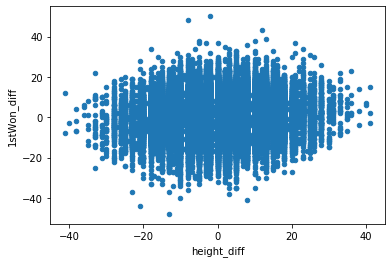

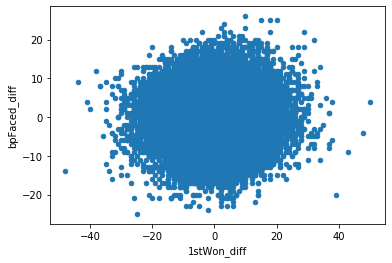

In [50]:
clean_df.plot.scatter(x='minutes', y='rank_diff')
clean_df.plot.scatter(x='minutes', y='height_diff')
clean_df.plot.scatter(x='minutes', y='1stWon_diff')
clean_df.plot.scatter(x='rank_diff', y='height_diff')
clean_df.plot.scatter(x='rank_diff', y='1stWon_diff')
clean_df.plot.scatter(x='rank_diff', y='bpFaced_diff')
clean_df.plot.scatter(x='height_diff', y='bpFaced_diff')
clean_df.plot.scatter(x='height_diff', y='1stWon_diff')
clean_df.plot.scatter(x='1stWon_diff', y='bpFaced_diff')

In [51]:
clean_df = clean_df[(clean_df['minutes'] < 400)]
clean_df.shape

(70162, 9)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


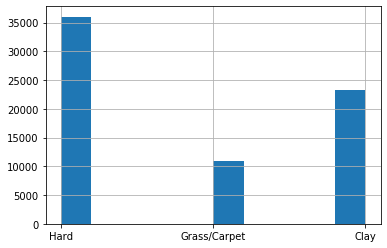

In [52]:
clean_df['surface'] = np.where((clean_df['surface'] == 'Grass') | (clean_df['surface'] == 'Carpet'), 'Grass/Carpet', clean_df['surface'])

clean_df['surface'].hist()

In [53]:
clean_df = pd.get_dummies(clean_df, prefix=['surface', 'round'], columns=['surface', 'round'])

In [54]:
pre_df = pd.DataFrame(columns = ['Algorithm', 'AUC Score', 'Accuracy Score'])
post_df = pd.DataFrame(columns = ['Algorithm', 'AUC Score', 'Accuracy Score'])

# Split Test/Train Data

In [55]:
y = clean_df['winner']

In [56]:
x_pre = clean_df.drop(['1stWon_diff','minutes', 'bpFaced_diff','winner'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x_pre, y, test_size=0.2, random_state=42)
x_pre.shape

(70162, 9)

In [57]:
x_post = clean_df.drop(['winner'], axis=1)
x_post_train, x_post_test, y_post_train, y_post_test = train_test_split(x_post, y, test_size=0.2, random_state=41)
x_post.shape

(70162, 12)

# Decision Tree

In [58]:
dt = tree.DecisionTreeClassifier(max_depth=3)
dt.fit(x_train, y_train)

dt_pred_test = dt.predict(x_test)
dt_pred_test_prob = dt.predict_proba(x_test)

dt_fpr, dt_tpr, dt_thresholds = metrics.roc_curve(y_test, dt_pred_test_prob[:,1])
dt_roc_auc = metrics.auc(dt_fpr, dt_tpr)

In [59]:
pre_df.loc[len(pre_df.index)] = ['Decision Tree',metrics.roc_auc_score(y_test, dt_pred_test_prob[:,1]),metrics.accuracy_score(y_test, dt_pred_test)]
pre_df

,Algorithm,AUC Score,Accuracy Score
0,Decision Tree,0.683815,0.650609


In [60]:
dt2 = tree.DecisionTreeClassifier(max_depth=3)
dt2.fit(x_post_train, y_post_train)

dt2_pred_test = dt2.predict(x_post_test)
dt2_pred_test_prob = dt2.predict_proba(x_post_test)

dt2_fpr, dt2_tpr, dt2_thresholds = metrics.roc_curve(y_post_test, dt2_pred_test_prob[:,1])
dt2_roc_auc = metrics.auc(dt2_fpr, dt2_tpr)

In [61]:
post_df.loc[len(post_df.index)] = ['Decision Tree',metrics.roc_auc_score(y_post_test, dt2_pred_test_prob[:,1]),metrics.accuracy_score(y_post_test, dt2_pred_test)]
post_df

,Algorithm,AUC Score,Accuracy Score
0,Decision Tree,0.900539,0.849783


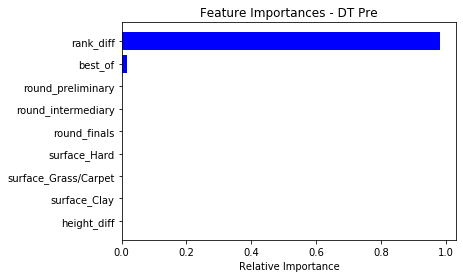

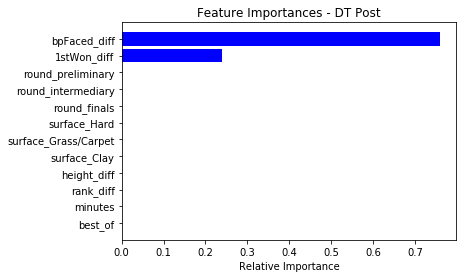

In [62]:
importances = dt.feature_importances_
indices = np.argsort(importances)
features = x_train.columns

plt.title('Feature Importances - DT Pre')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

importances = dt2.feature_importances_
indices = np.argsort(importances)
features = x_post_train.columns

plt.title('Feature Importances - DT Post')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

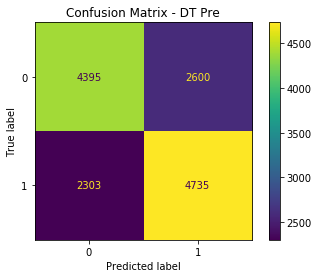

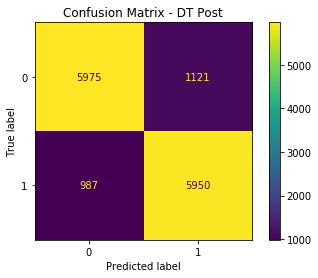

In [63]:
metrics.plot_confusion_matrix(dt, x_test, y_test, values_format='d')  
plt.title('Confusion Matrix - DT Pre')
plt.show()

metrics.plot_confusion_matrix(dt2, x_post_test, y_post_test, values_format='d')  
plt.title('Confusion Matrix - DT Post')
plt.show()

# Random Forest

In [64]:
rf = ens.RandomForestClassifier(max_depth=3, random_state=0)
rf.fit(x_train, y_train)

rf_pred_test = rf.predict(x_test)
rf_pred_test_prob = rf.predict_proba(x_test)

rf_fpr, rf_tpr, rf_thresholds = metrics.roc_curve(y_test, rf_pred_test_prob[:,1])
rf_roc_auc = metrics.auc(rf_fpr, rf_tpr)

In [65]:
pre_df.loc[len(pre_df.index)] = ['Random Forest',metrics.roc_auc_score(y_test, rf_pred_test_prob[:,1]),metrics.accuracy_score(y_test, rf_pred_test)]
pre_df

,Algorithm,AUC Score,Accuracy Score
0,Decision Tree,0.683815,0.650609
1,Random Forest,0.686330,0.650609


In [66]:
rf2 = ens.RandomForestClassifier(max_depth=3, random_state=0)
rf2.fit(x_post_train, y_post_train)

rf2_pred_test = rf2.predict(x_post_test)
rf2_pred_test_prob = rf2.predict_proba(x_post_test)

rf2_fpr, rf2_tpr, rf2_thresholds = metrics.roc_curve(y_post_test, rf2_pred_test_prob[:,1])
rf2_roc_auc = metrics.auc(rf2_fpr, rf2_tpr)

In [67]:
post_df.loc[len(post_df.index)] = ['Random Forest',metrics.roc_auc_score(y_post_test, rf2_pred_test_prob[:,1]),metrics.accuracy_score(y_post_test, rf2_pred_test)]
post_df

,Algorithm,AUC Score,Accuracy Score
0,Decision Tree,0.900539,0.849783
1,Random Forest,0.920118,0.838880


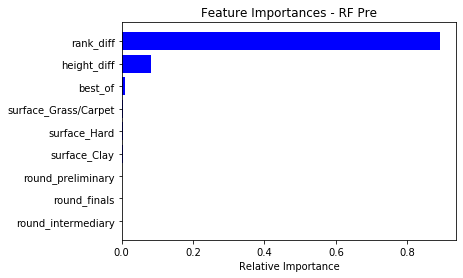

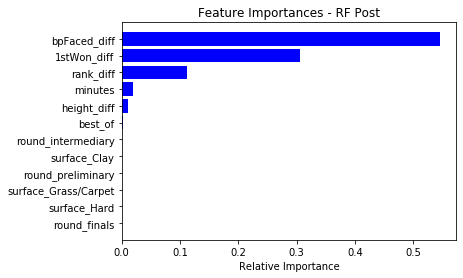

In [68]:
importances = rf.feature_importances_
indices = np.argsort(importances)
features = x_train.columns

plt.title('Feature Importances - RF Pre')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

importances = rf2.feature_importances_
indices = np.argsort(importances)
features = x_post_train.columns

plt.title('Feature Importances - RF Post')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

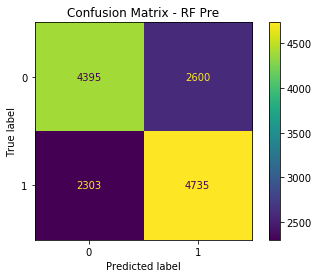

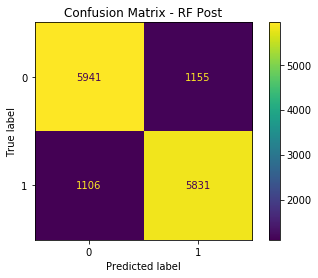

In [69]:
metrics.plot_confusion_matrix(rf, x_test, y_test, values_format='d')  
plt.title('Confusion Matrix - RF Pre')
plt.show()

metrics.plot_confusion_matrix(rf2, x_post_test, y_post_test, values_format='d')  
plt.title('Confusion Matrix - RF Post')
plt.show()

# Gradient Boosting Machines

In [70]:
gbm = ens.GradientBoostingClassifier(max_depth=3, random_state=2018, n_estimators=100, verbose=1)
gbm = gbm.fit(x_train, y_train)

gbm_pred_test = gbm.predict(x_test)
gbm_pred_test_prob = gbm.predict_proba(x_test)

gbm_fpr, gbm_tpr, gbm_thresholds = metrics.roc_curve(y_test, gbm_pred_test_prob[:,1])
gbm_roc_auc = metrics.auc(gbm_fpr, gbm_tpr)

      Iter       Train Loss   Remaining Time 
         1           1.3670            9.67s
         2           1.3514            6.28s
         3           1.3386            5.04s
         4           1.3281            4.40s
         5           1.3196            4.03s
         6           1.3126            3.88s
         7           1.3067            3.68s
         8           1.3020            3.52s
         9           1.2979            3.37s
        10           1.2946            3.27s
        20           1.2801            2.60s
        30           1.2763            2.26s
        40           1.2746            1.89s
        50           1.2736            1.53s
        60           1.2731            1.22s
        70           1.2724            0.91s
        80           1.2719            0.60s
        90           1.2713            0.30s
       100           1.2707            0.00s


In [71]:
pre_df.loc[len(pre_df.index)] = ['Gradient Boosting Machines',metrics.roc_auc_score(y_test, gbm_pred_test_prob[:,1]),metrics.accuracy_score(y_test, gbm_pred_test)]
pre_df

,Algorithm,AUC Score,Accuracy Score
0,Decision Tree,0.683815,0.650609
1,Random Forest,0.686330,0.650609
2,Gradient Boosting Machines,0.688380,0.649042


In [72]:
gbm2 = ens.GradientBoostingClassifier(max_depth=3, random_state=2018, n_estimators=100, verbose=1)
gbm2 = gbm2.fit(x_post_train, y_post_train)

gbm2_pred_test = gbm2.predict(x_post_test)
gbm2_pred_test_prob = gbm2.predict_proba(x_post_test)

gbm2_fpr, gbm2_tpr, gbm2_thresholds = metrics.roc_curve(y_post_test, gbm2_pred_test_prob[:,1])
gbm2_roc_auc = metrics.auc(gbm2_fpr, gbm2_tpr)

      Iter       Train Loss   Remaining Time 
         1           1.2845            6.64s
         2           1.2002            5.72s
         3           1.1283            5.25s
         4           1.0690            4.97s
         5           1.0177            4.92s
         6           0.9741            4.83s
         7           0.9354            4.69s
         8           0.9024            4.57s
         9           0.8738            4.59s
        10           0.8481            4.49s
        20           0.7070            3.81s
        30           0.6559            3.28s
        40           0.6326            2.78s
        50           0.6195            2.33s
        60           0.6115            1.99s
        70           0.6049            1.55s
        80           0.6007            1.03s
        90           0.5966            0.51s
       100           0.5945            0.00s


In [73]:
post_df.loc[len(post_df.index)] = ['Gradient Boosting Machines',metrics.roc_auc_score(y_post_test, gbm2_pred_test_prob[:,1]),metrics.accuracy_score(y_post_test, gbm2_pred_test)]
post_df

,Algorithm,AUC Score,Accuracy Score
0,Decision Tree,0.900539,0.849783
1,Random Forest,0.920118,0.838880
2,Gradient Boosting Machines,0.944692,0.863393


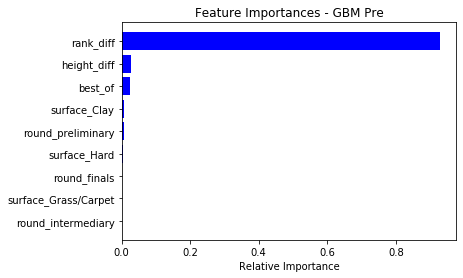

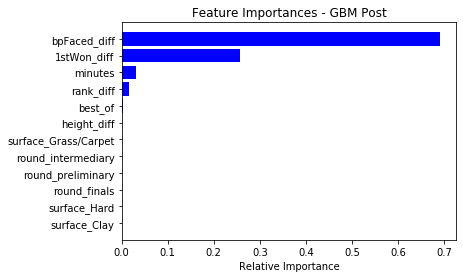

In [74]:
importances = gbm.feature_importances_
indices = np.argsort(importances)
features = x_train.columns

plt.title('Feature Importances - GBM Pre')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

importances = gbm2.feature_importances_
indices = np.argsort(importances)
features = x_post_train.columns

plt.title('Feature Importances - GBM Post')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

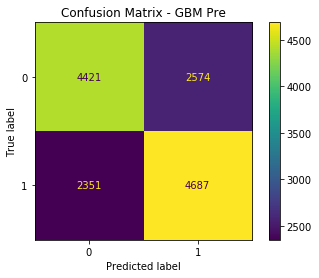

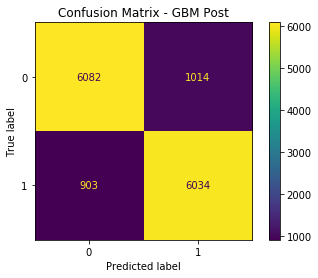

In [75]:
metrics.plot_confusion_matrix(gbm, x_test, y_test, values_format='d')  
plt.title('Confusion Matrix - GBM Pre')
plt.show()

metrics.plot_confusion_matrix(gbm2, x_post_test, y_post_test, values_format='d')  
plt.title('Confusion Matrix - GBM Post')
plt.show()

# Scaling the Data

In [76]:
scaler = StandardScaler()  
scaler.fit(x_train)

x_train = scaler.transform(x_train)  
x_test = scaler.transform(x_test) 

scaler_post = StandardScaler()  
scaler_post.fit(x_post_train)

x_post_train = scaler_post.transform(x_post_train)  
x_post_test = scaler_post.transform(x_post_test) 

# K Nearest Neighbors

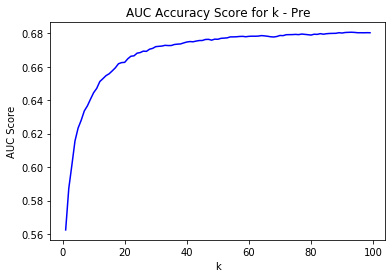

In [80]:
x_axis=[]
y_axis=[]
for i in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn = knn.fit(x_train, y_train)
    
    pred_test_prob = knn.predict_proba(x_test)
    x_axis.append(i)
    y_axis.append(metrics.roc_auc_score(y_test, pred_test_prob[:,1]))
    
plt.plot(x_axis, y_axis, 'b')
plt.title('AUC Accuracy Score for k - Pre')
plt.xlabel('k')
plt.ylabel('AUC Score')
plt.show()
    

In [78]:
knn = KNeighborsClassifier(n_neighbors=25)
knn = knn.fit(x_train, y_train)

knn_pred_test = knn.predict(x_test)
knn_pred_test_prob = knn.predict_proba(x_test)

knn_fpr, knn_tpr, knn_thresholds = metrics.roc_curve(y_test, knn_pred_test_prob[:,1])
knn_roc_auc = metrics.auc(knn_fpr, knn_tpr)

In [79]:
pre_df.loc[len(pre_df.index)] = ['K-Nearest Neighbors',metrics.roc_auc_score(y_test, knn_pred_test_prob[:,1]),metrics.accuracy_score(y_test, knn_pred_test)]
pre_df

,Algorithm,AUC Score,Accuracy Score
0,Decision Tree,0.683815,0.650609
1,Random Forest,0.686330,0.650609
2,Gradient Boosting Machines,0.688380,0.649042
3,K-Nearest Neighbors,0.668489,0.633079


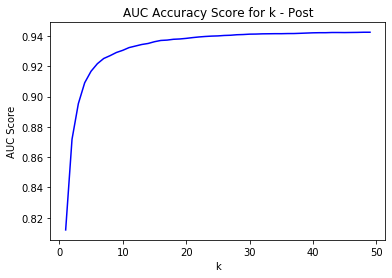

In [81]:
x_axis=[]
y_axis=[]
for i in range(1,50):
    knn2 = KNeighborsClassifier(n_neighbors=i)
    knn2 = knn2.fit(x_post_train, y_post_train)
    
    pred_test_prob = knn2.predict_proba(x_post_test)
    x_axis.append(i)
    y_axis.append(metrics.roc_auc_score(y_post_test, pred_test_prob[:,1]))
    
plt.plot(x_axis, y_axis, 'b')
plt.title('AUC Accuracy Score for k - Post')
plt.xlabel('k')
plt.ylabel('AUC Score')
plt.show()
    

In [82]:
knn2 = KNeighborsClassifier(n_neighbors=20)
knn2 = knn2.fit(x_post_train, y_post_train)

knn2_pred_test = knn2.predict(x_post_test)
knn2_pred_test_prob = knn2.predict_proba(x_post_test)

knn2_fpr, knn2_tpr, knn2_thresholds = metrics.roc_curve(y_post_test, knn2_pred_test_prob[:,1])
knn2_roc_auc = metrics.auc(knn2_fpr, knn2_tpr)

In [83]:
post_df.loc[len(post_df.index)] = ['K-Nearest Neighbors',metrics.roc_auc_score(y_post_test, knn2_pred_test_prob[:,1]),metrics.accuracy_score(y_post_test, knn2_pred_test)]
post_df

,Algorithm,AUC Score,Accuracy Score
0,Decision Tree,0.900539,0.849783
1,Random Forest,0.920118,0.838880
2,Gradient Boosting Machines,0.944692,0.863393
3,K-Nearest Neighbors,0.938511,0.859688


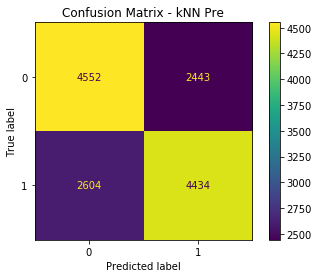

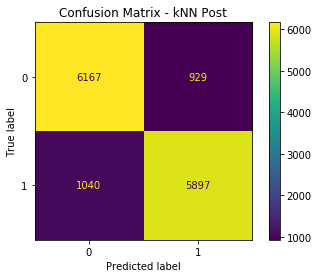

In [84]:
metrics.plot_confusion_matrix(knn, x_test, y_test, values_format='d')  
plt.title('Confusion Matrix - kNN Pre')
plt.show()

metrics.plot_confusion_matrix(knn2, x_post_test, y_post_test, values_format='d')  
plt.title('Confusion Matrix - kNN Post')
plt.show()

# Comparison Study

                    Algorithm  AUC Score  Accuracy Score
0               Decision Tree   0.683815        0.650609
1               Random Forest   0.686330        0.650609
2  Gradient Boosting Machines   0.688380        0.649042
3         K-Nearest Neighbors   0.668489        0.633079


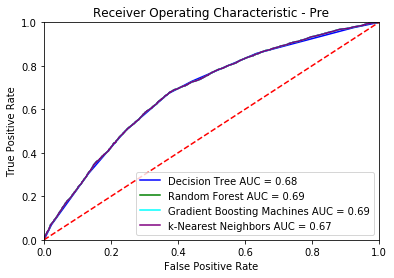

In [85]:
print(pre_df)

plt.title('Receiver Operating Characteristic - Pre')
plt.plot(dt_fpr, dt_tpr, 'b', label = 'Decision Tree AUC = %0.2f' % dt_roc_auc)
plt.plot(rf_fpr, rf_tpr, 'g', label = 'Random Forest AUC = %0.2f' % rf_roc_auc)
plt.plot(rf_fpr, rf_tpr, 'cyan', label = 'Gradient Boosting Machines AUC = %0.2f' % gbm_roc_auc)
plt.plot(rf_fpr, rf_tpr, 'purple', label = 'k-Nearest Neighbors AUC = %0.2f' % knn_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.show()

                    Algorithm  AUC Score  Accuracy Score
0               Decision Tree   0.900539        0.849783
1               Random Forest   0.920118        0.838880
2  Gradient Boosting Machines   0.944692        0.863393
3         K-Nearest Neighbors   0.938511        0.859688


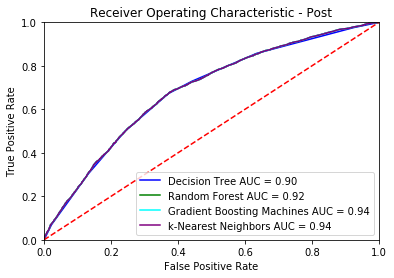

In [86]:
print(post_df)

plt.title('Receiver Operating Characteristic - Post')
plt.plot(dt_fpr, dt_tpr, 'b', label = 'Decision Tree AUC = %0.2f' % dt2_roc_auc)
plt.plot(rf_fpr, rf_tpr, 'g', label = 'Random Forest AUC = %0.2f' % rf2_roc_auc)
plt.plot(rf_fpr, rf_tpr, 'cyan', label = 'Gradient Boosting Machines AUC = %0.2f' % gbm2_roc_auc)
plt.plot(rf_fpr, rf_tpr, 'purple', label = 'k-Nearest Neighbors AUC = %0.2f' % knn2_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()